<a href="https://colab.research.google.com/github/titopucp2024/online-shoppers-purchasing-intention/blob/main/Desarrollo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Trabajo final: Predicción de la intención de compra de los
compradores online**

Laure Schlesinger

Hector Calla

Gabriel Espinosa

**Link Github:**
https://github.com/titopucp2024/online-shoppers-purchasing-intention/


# EXPLORACIÓN DE LA DATA


In [ ]:
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import inspect
!pip install scorecardpy
import scorecardpy as sc
pd.set_option("display.max_columns", 50)
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scorecardpy: filename=scorecardpy-0.1.9.7-py3-none-any.whl size=60634 sha256=1c4dfb62a06cca539cc4bacb33121f812d2aca20a71aca30282beb594b2f1495
  Stored in directory: /root/.cache/pip/wheels/49/49/e9/7b845548eed3624ce37effdd13e9cb95a99272d692eb9e9e23
Successfully built scorecardpy


In [ ]:
# Cargar los datos desde un archivo CSV (subirlo previamente a la carpeta de Colab)
file_train = "/content/online_shoppers_intention.csv"

df = pd.read_csv(file_train)
df.shape

(12330, 18)

| **Variable**                | **Tipo**    | **Descripción**                                                                                                                                                    |
|-----------------------------|-------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Administrative              | Numérica    | Número de páginas de administración visitadas por el usuario.                                                                                                      |
| Administrative_Duration     | Numérica    | Duración total en segundos que el usuario ha pasado en las páginas de administración.                                                                              |
| Informational               | Numérica    | Número de páginas informativas visitadas por el usuario.                                                                                                           |
| Informational_Duration      | Numérica    | Duración total en segundos que el usuario ha pasado en las páginas informativas.                                                                                   |
| ProductRelated              | Numérica    | Número de páginas relacionadas con productos visitadas por el usuario.                                                                                             |
| ProductRelated_Duration     | Numérica    | Duración total en segundos que el usuario ha pasado en las páginas relacionadas con productos.                                                                     |
| BounceRates                 | Numérica    | Tasa de rebote de la sesión.                                                                                                                                       |
| ExitRates                   | Numérica    | Tasa de salida de la sesión.                                                                                                                                       |
| PageValues                  | Numérica    | Valor de la página.                                                                                                                                                |
| SpecialDay                  | Numérica    | Importancia del día para las compras especiales (valor entre 0 y 1).                                                                                               |
| Month                       | Categórica  | Mes del año en que la visita ocurrió (Ejemplos: 'Jan', 'Feb', 'Mar', etc.).                                                                                        |
| OperatingSystems            | Categórica  | Sistema operativo del visitante (Ejemplos: 1 para Windows, 2 para Linux, etc.).                                                                                    |
| Browser                     | Categórica  | Navegador del visitante (Ejemplos: 1 para Chrome, 2 para Firefox, etc.).                                                                                           |
| Region                      | Categórica  | Región del visitante (Ejemplos: 1 para América del Norte, 2 para Europa, etc.).                                                                                    |
| TrafficType                 | Categórica  | Tipo de tráfico de la visita (Ejemplos: 1 para tráfico directo, 2 para tráfico de referencia, etc.).                                                               |
| VisitorType                 | Categórica  | Tipo de visitante (nuevo o recurrente) (Ejemplos: 'Returning_Visitor', 'New_Visitor').                                                                             |
| Weekend                     | Booleana    | Indica si la visita ocurrió durante el fin de semana (True o False).                                                                                               |
| Revenue                     | Booleana    | Indica si el visitante completó una transacción (True o False).                                                                                                    |


## Variable Objetivo

Revenue
False    10422
True      1908
Name: count, dtype: int64


<ipython-input-3-3741f5269f5a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  grafico = sns.barplot(x=cuentas_ingresos.index, y=cuentas_ingresos.values, palette='coolwarm')


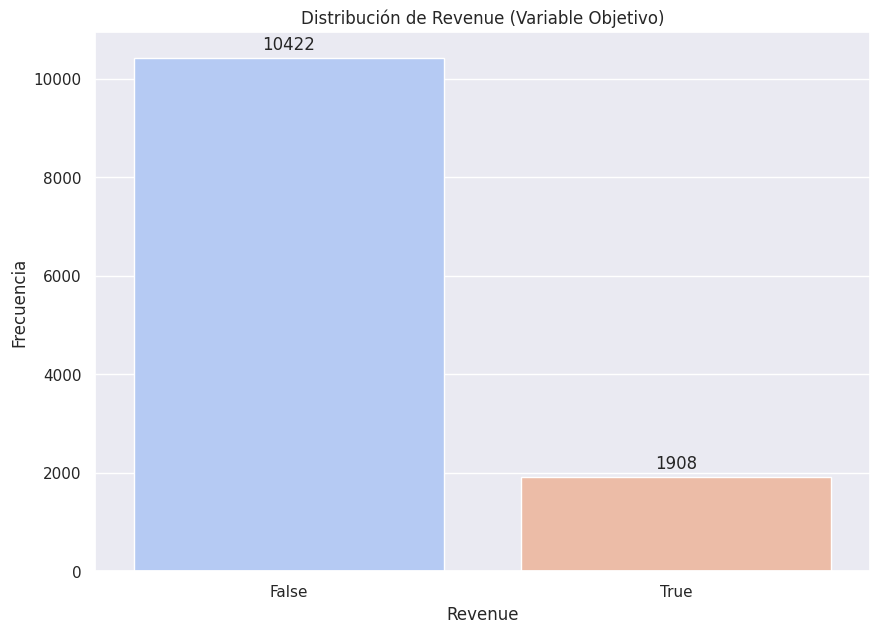

In [ ]:
# Contar los valores de la columna 'Revenue'
cuentas_ingresos = df['Revenue'].value_counts()
print(cuentas_ingresos)
sns.set(style="darkgrid")
plt.figure(figsize=(10, 7))
grafico = sns.barplot(x=cuentas_ingresos.index, y=cuentas_ingresos.values, palette='coolwarm')
plt.title('Distribución de Revenue (Variable Objetivo)')
plt.xlabel('Revenue')
plt.ylabel('Frecuencia')
for barra in grafico.patches:
    grafico.annotate(format(barra.get_height(), '.0f'),
                     (barra.get_x() + barra.get_width() / 2., barra.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
plt.show()

## Fin de Semana (Weekend)

<ipython-input-4-87c668c0ac3e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Weekend', palette='colorblind')


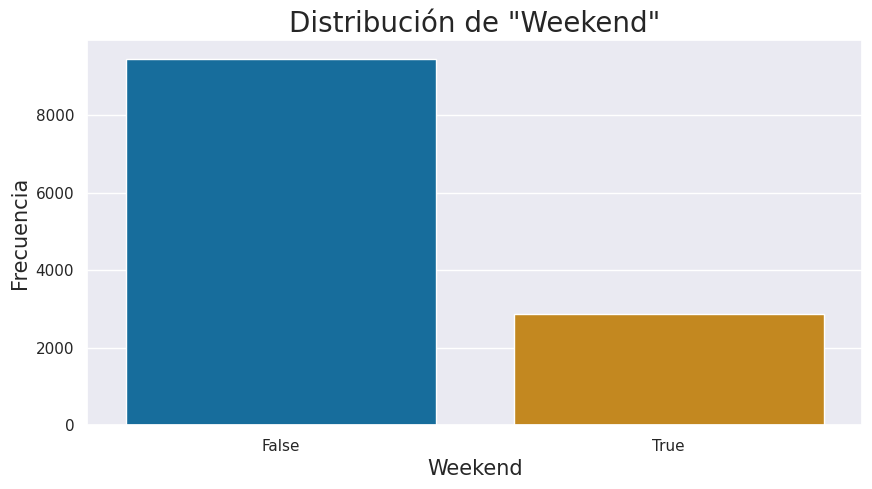

In [ ]:
# Configurar el tamaño de la figura
plt.rcParams['figure.figsize'] = (10, 5)

# Crear el gráfico de barras con un estilo más ligero
plt.figure()
sns.countplot(data=df, x='Weekend', palette='colorblind')

# Añadir título y etiquetas a los ejes
plt.title('Distribución de "Weekend"', fontsize=20)
plt.xlabel('Weekend', fontsize=15)
plt.ylabel('Frecuencia', fontsize=15)

# Mostrar el gráfico
plt.show()

# Navegador (Browse)

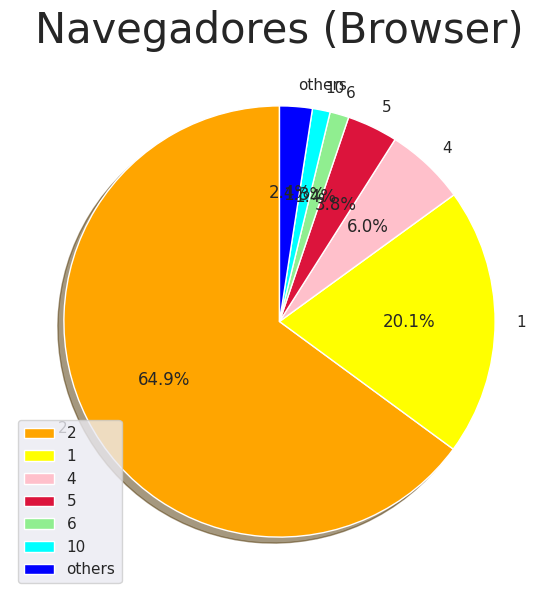

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

size = [7961, 2462, 736, 467,174, 163, 300]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'blue']
labels = "2", "1", "4", "5", "6", "10", "others"


plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.1f%%', startangle = 90)
plt.title('Navegadores (Browser)', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

## Mes

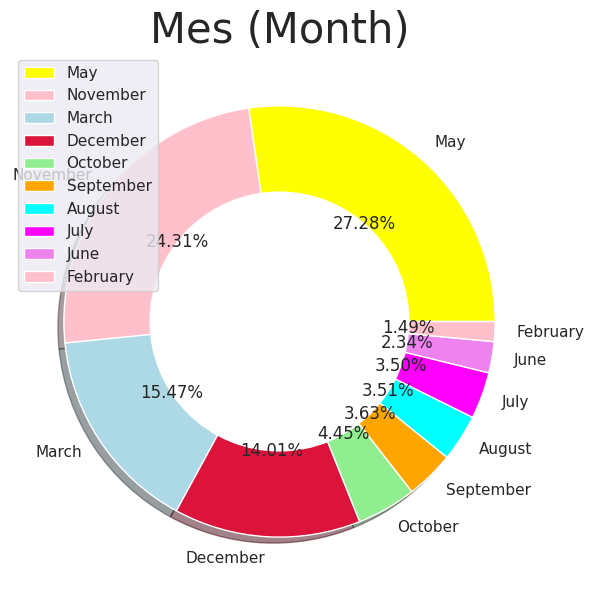

In [ ]:
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['yellow', 'pink', 'lightblue', 'crimson', 'lightgreen', 'orange', 'cyan', 'magenta', 'violet', 'pink', 'lightblue', 'red']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"
explode = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

circle = plt.Circle((0, 0), 0.6, color = 'white')

plt.rcParams['figure.figsize'] = (18, 7)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Mes (Month)', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(circle)
plt.axis('off')
plt.legend()
plt.show()

Hay dos meses faltantes

## Tipo de visitante

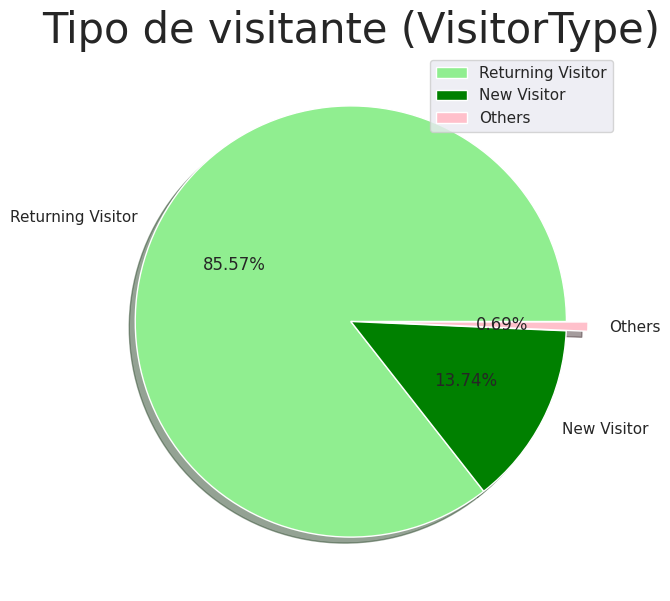

In [ ]:

plt.rcParams['figure.figsize'] = (18, 7)
size = [10551, 1694, 85]
colors = ['lightGreen', 'green', 'pink']
labels = "Returning Visitor", "New Visitor", "Others"
explode = [0, 0, 0.1]
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels, explode = explode, shadow = True, autopct = '%.2f%%')
plt.title('Tipo de visitante (VisitorType)', fontsize = 30)
plt.axis('off')
plt.legend()
plt.show()

Más del 85% de visitantes son aquellos que regresan a la página

## Tipo de tráfico

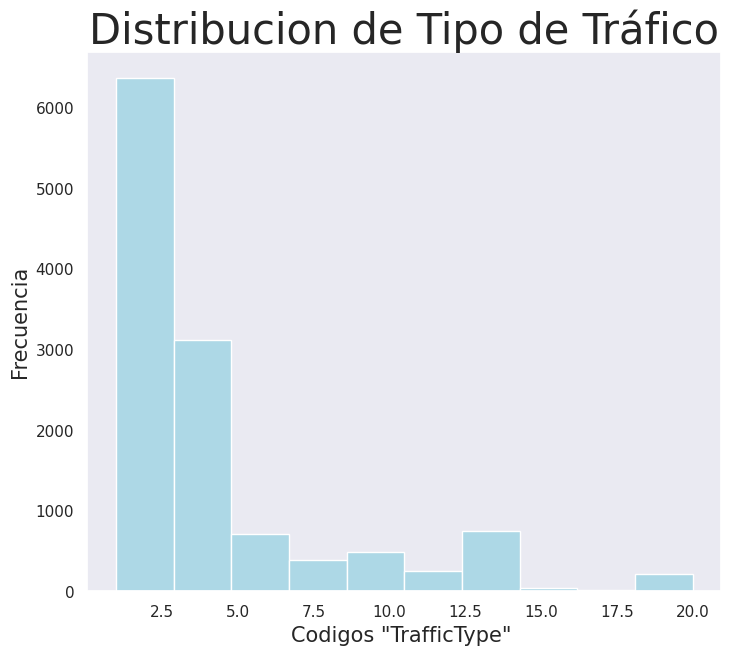

In [ ]:
# visualizing the distribution of different traffic around the TrafficType
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['TrafficType'], color = 'lightblue')
plt.title('Distribucion de Tipo de Tráfico', fontsize = 30)
plt.xlabel('Codigos "TrafficType" ', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)
plt.grid()
plt.show()

Se ve una distribución exponencial: no es gaussiana

## Region

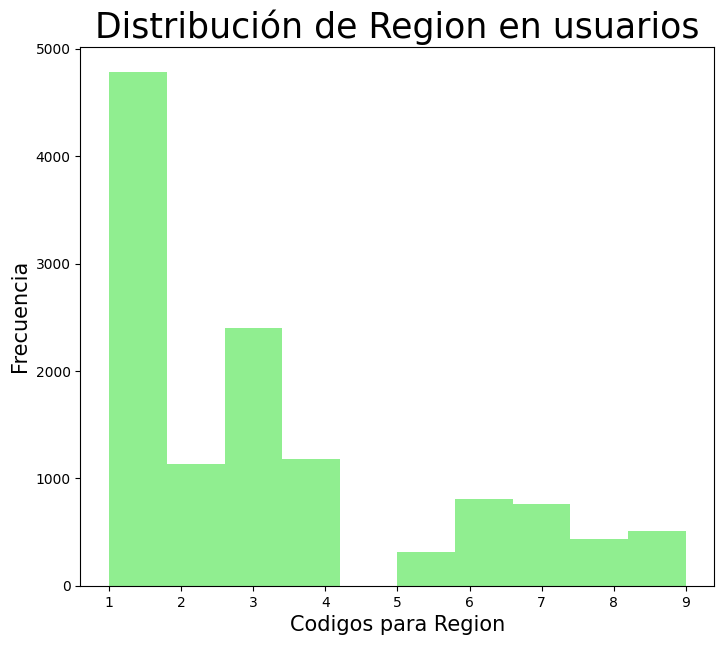

In [ ]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
plt.hist(df['Region'], color = 'lightgreen')
plt.title('Distribución de Region en usuarios', fontsize = 25)
plt.xlabel('Codigos para Region', fontsize = 15)
plt.ylabel('Frecuencia', fontsize = 15)

plt.show()

Esta distribuido de una manera exponencial

# Análisis de comparar varias variables

# Admin duration vs Revenue

<ipython-input-4-31ab3b73c198>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Administrative_Duration', y='Revenue', data=df, palette='pastel', orient='h')


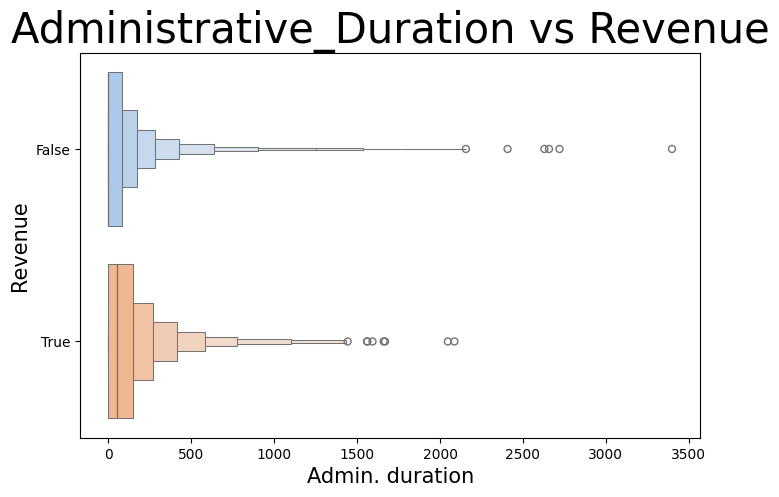

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x='Administrative_Duration', y='Revenue', data=df, palette='pastel', orient='h')
plt.title('Administrative_Duration vs Revenue', fontsize=30)
plt.xlabel('Admin. duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()


Podemos observar que la variable Administrative_Duration tiene una distribución exponencial tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las no compras (False) según Administrative_Duration.








## Informational_Duration vs Revenue

<ipython-input-5-db00b70ea96b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='Informational_Duration', y='Revenue', data=df, palette='rainbow', orient='h')


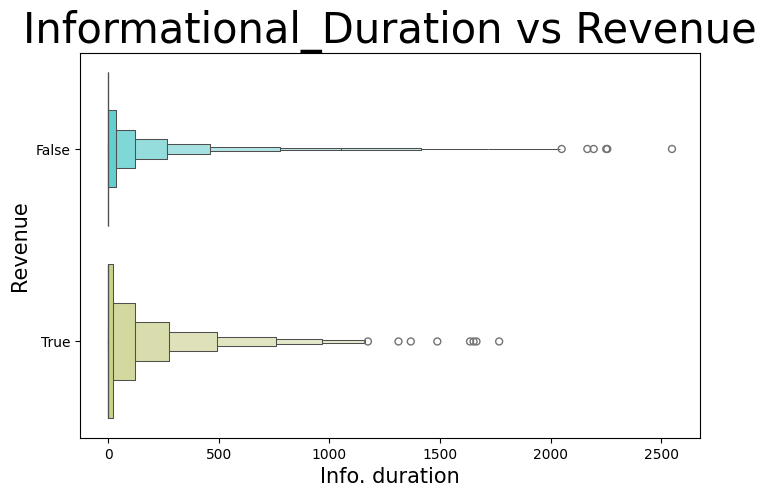

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x='Informational_Duration', y='Revenue', data=df, palette='rainbow', orient='h')
plt.title('Informational_Duration vs Revenue', fontsize=30)
plt.xlabel('Info. duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)

plt.show()


Podemos observar que la variable Informational_Duration tiene una distribución exponencial tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las no compras (False) según Informational_Duration.











## ProductRelated_Duration vs Revenue

<ipython-input-6-e036e6e1a26d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='ProductRelated_Duration', y='Revenue', data=df, palette='inferno', orient='h')


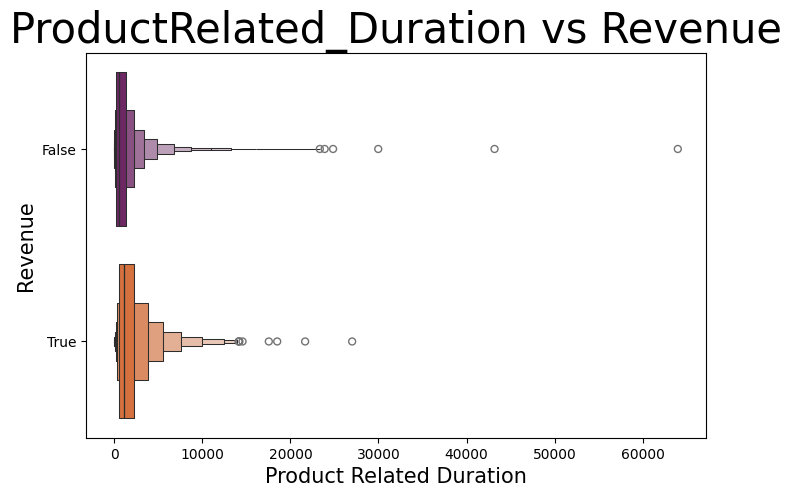

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x='ProductRelated_Duration', y='Revenue', data=df, palette='inferno', orient='h')
plt.title('ProductRelated_Duration vs Revenue', fontsize=30)
plt.xlabel('Product Related Duration', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

## Exit rates vs Revenue

<ipython-input-34-01808d0f5c88>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='ExitRates', y='Revenue', data=df, palette='dark', orient='h')


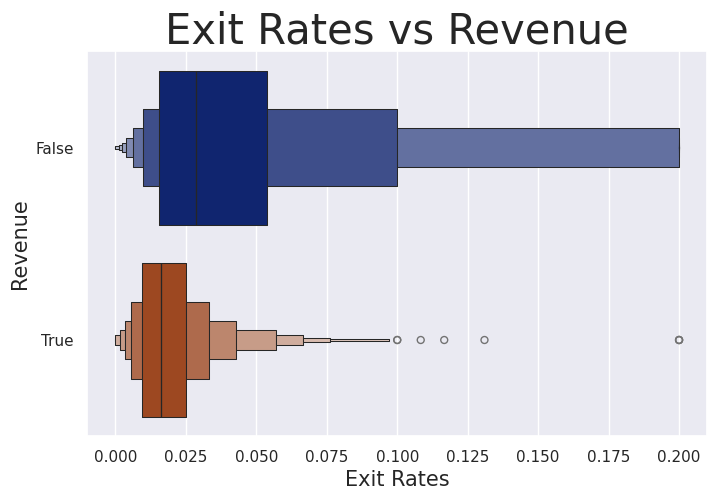

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.boxenplot(x='ExitRates', y='Revenue', data=df, palette='dark', orient='h')
plt.title('Exit Rates vs Revenue', fontsize=30)
plt.xlabel('Exit Rates', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

Tiene una distribución normal (gaussiana) tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las no compras (False) según ExitRates.

## PageValues vs Revenue

<ipython-input-30-cd56bca7cc1f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='PageValues', y='Revenue', data=df, palette='spring', orient='h')


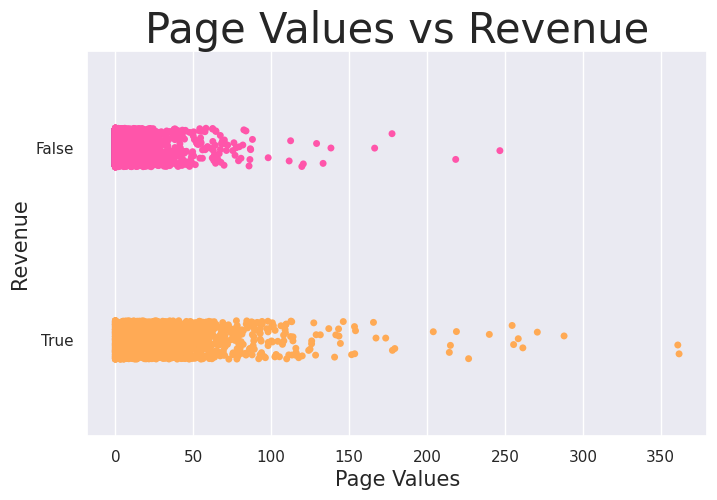

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(x='PageValues', y='Revenue', data=df, palette='spring', orient='h')
plt.title('Page Values vs Revenue', fontsize=30)
plt.xlabel('Page Values', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()



Podemos observar que la variable PageValues tiene una distribución exponencial tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las compras realizadas (True) según ExitRates. Lo más importante aquí es que PageValues tiene una gran influencia en la decisión de comprar (True) un producto.

## Bounce rates vs Revenue

<ipython-input-31-2d5781e630cc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='BounceRates', y='Revenue', data=df, palette='autumn', orient='h')


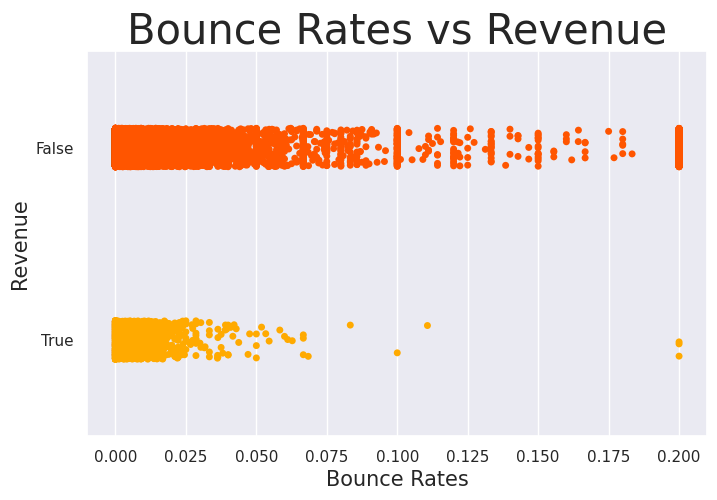

In [ ]:
plt.rcParams['figure.figsize'] = (8, 5)

sns.stripplot(x='BounceRates', y='Revenue', data=df, palette='autumn', orient='h')
plt.title('Bounce Rates vs Revenue', fontsize=30)
plt.xlabel('Bounce Rates', fontsize=15)
plt.ylabel('Revenue', fontsize=15)
plt.show()

Podemos observar que la variable BounceRates tiene una distribución exponencial tanto para las compras realizadas (True) como para las no realizadas (False). También notamos que hay muchos valores atípicos en las no compras (False) según ExitRates. BounceRates tiene una gran influencia en la decisión de comprar un producto o no.








## Weekend vs Revenue

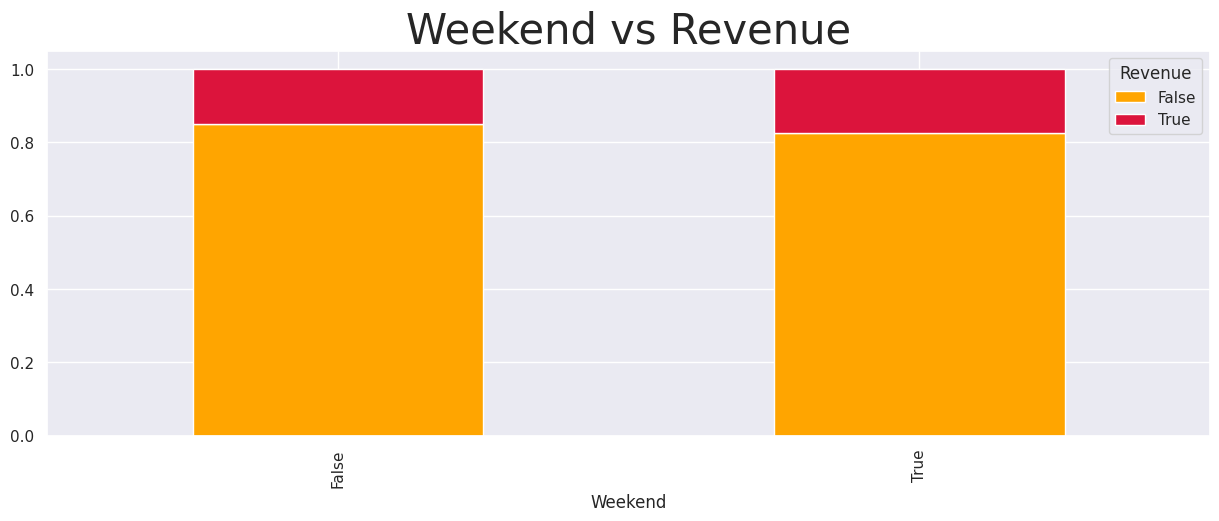

In [ ]:
dfW = pd.crosstab(df['Weekend'], df['Revenue'])
dfW.div(dfW.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

No hay nada significativo, se puede ignorar esta variable

# Traffic Type vs Revenue

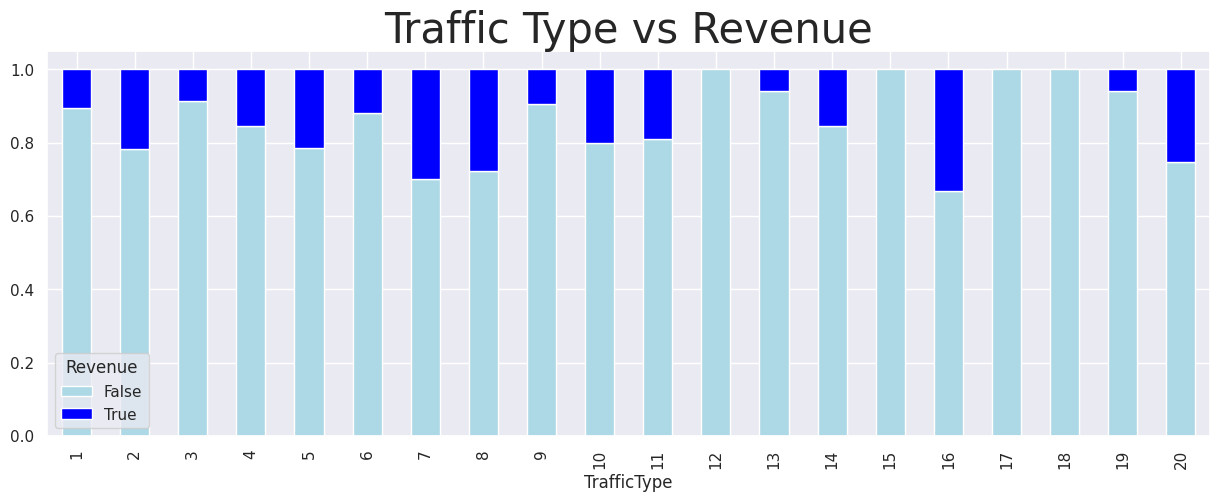

In [ ]:
dfT = pd.crosstab(df['TrafficType'], df['Revenue'])
dfT.div(dfT.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.show()

Si es significativo la diferencia del tipo de trafico

## Visitor Type vs Revenue

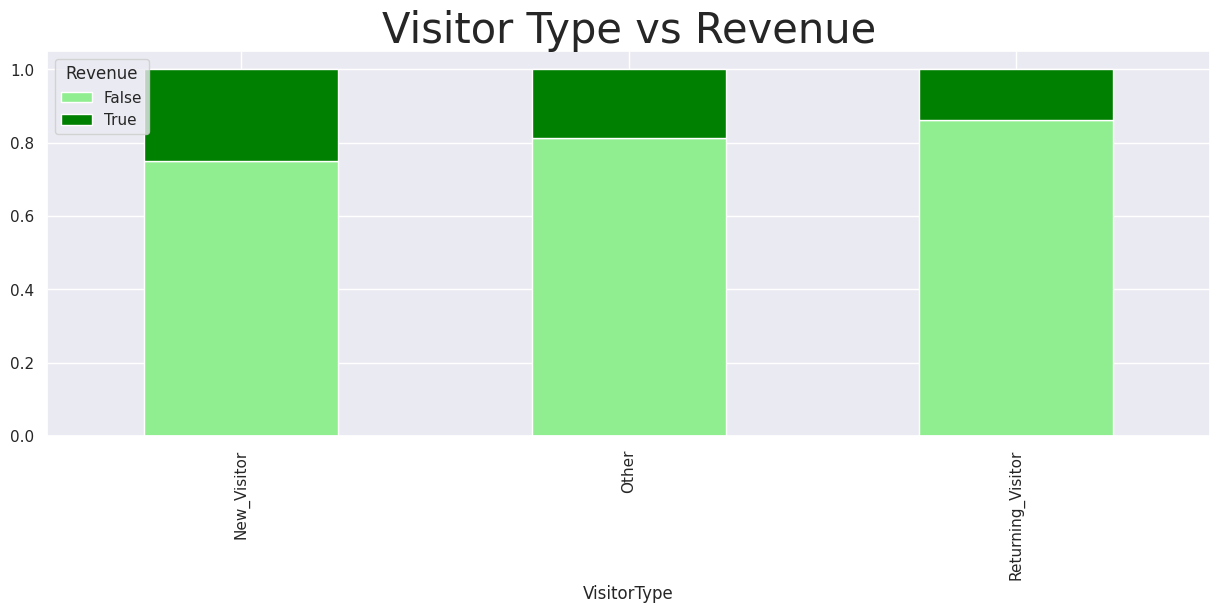

In [ ]:
dfV = pd.crosstab(df['VisitorType'], df['Revenue'])
dfV.div(dfV.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize =(15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

Sí es importante

## Region vs Revenue

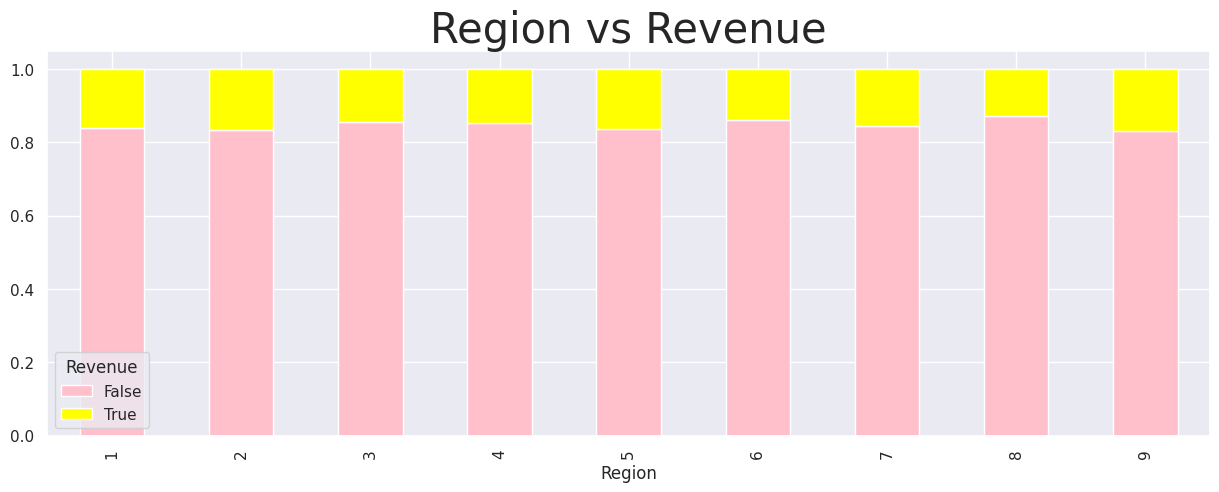

In [ ]:
dfR = pd.crosstab(df['Region'], df['Revenue'])
dfR.div(dfR.sum(1).astype(float), axis=0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['pink', 'yellow'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

Los valores son similares, se puede dejar de lado

# Analisis de Correlacion

<Axes: >

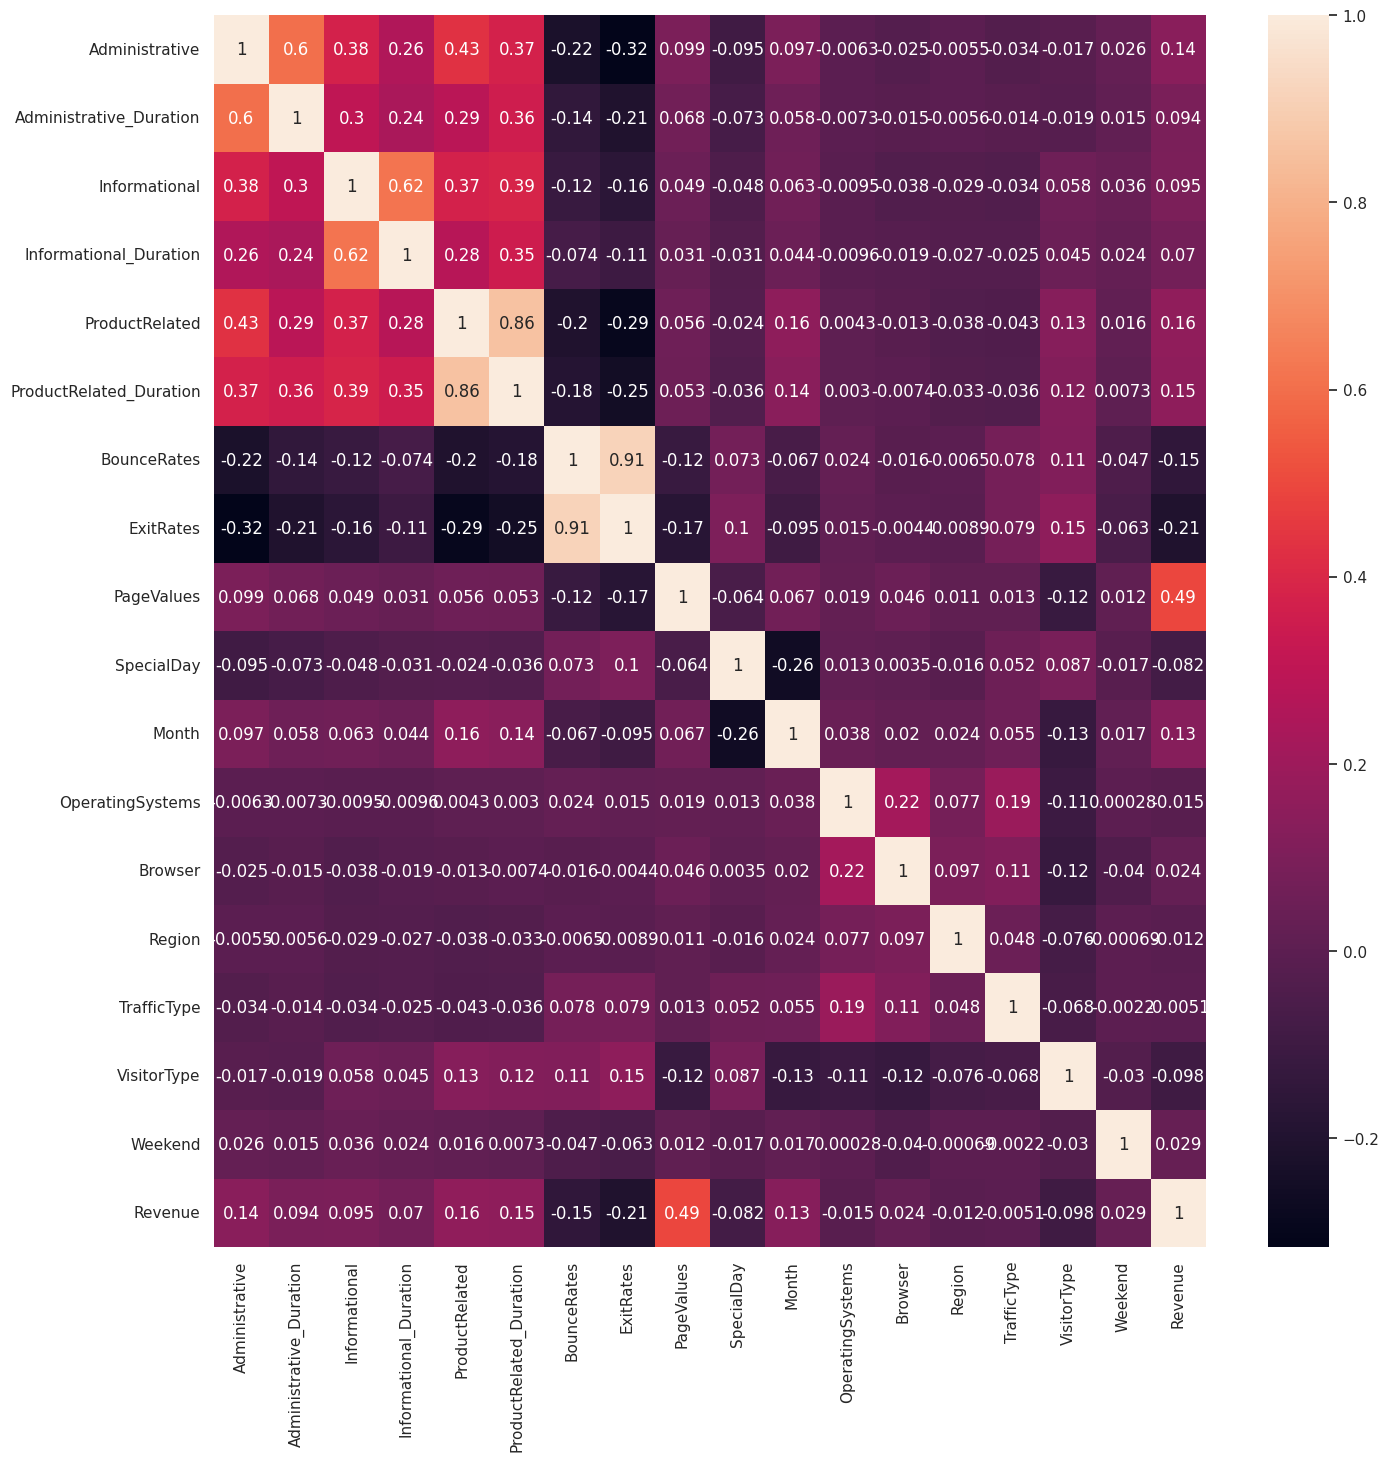

In [ ]:
Month={'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,'Dec':12}
df['Month']=df['Month'].map(Month)

VisitorType={'Returning_Visitor':3, 'New_Visitor':2, 'Other':1}
df['VisitorType']=df['VisitorType'].map(VisitorType)
d={True:1,False:0}
df['Weekend']=df['Weekend'].map(d)
df['Revenue']=df['Revenue'].map(d)
Var_Corr = df.corr()
fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

Existe una altísima correlación entre BounceRate y ExitRate. Ambas métricas miden algún tipo de abandono del sitio web. La Bounce Rate es un caso especial de la Exit Rate, donde la salida ocurre después de visitar solo una página.
Los visitantes que abandonan el sitio después de una página (BounceRate) contribuyen directamente a la tasa de salida (ExitRate). Si muchas visitas consisten en ver solo una página, ambas métricas serán altas

# Duplicados

In [ ]:
duplicados = df[df.duplicated()]

# Opcionalmente, puedes contar el número de filas duplicadas
num_duplicados = duplicados.shape[0]
print(f'Número de filas duplicadas: {num_duplicados}')

Número de filas duplicadas: 125


In [ ]:
duplicados = df[df.duplicated(keep=False)]

No hay manera de saber con certeza que estos registros fueron duplicados erróneamente en la adquisición de la data. Se presume que son sesiones diferentes tras la lectura del paper y de interpretaciones de la literatura. No se eliminarán estos registros duplicados

# PREPROCESAMIENTO DE LA DATA

**LIMPIEZA BÁSICA DE LOS DATOS**

In [ ]:
data = df.copy()

In [ ]:
# Nota: No existen valores nulos. Existen 125 registros duplicados, pero considerando que varias sesiones pueden ser de un mismo usuario y presentar caracteristicas similares, se decide no borrarlos.

# Cambiamos los valores booleanos a 0 y 1

print(data['Weekend'].value_counts())
print(data['Revenue'].value_counts())

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['Weekend'] = le.fit_transform(data['Weekend'])
data['Revenue'] = le.fit_transform(data['Revenue'])

print('\nValores nuevos')
print(data['Weekend'].value_counts())
print(data['Revenue'].value_counts())

In [ ]:
# Realizamos un one hot encoding (OH) para transformar las variables categóricas en variables dummies, debido a que no son ordinales.

# Convertimos los valores enteros a categoricos para que el get_dummies pueda leerlos
data['OperatingSystems'] = data['OperatingSystems'].astype('category')
data['Browser'] = data['Browser'].astype('category')
data['Region'] = data['Region'].astype('category')
data['TrafficType'] = data['TrafficType'].astype('category')

# Convertir las columnas categóricas en variables dummies
data_dummies = pd.get_dummies(data[['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType']], drop_first=False, dtype=int)

# Concatenar los DataFrames originales y los dummies
conjunto_OH = pd.concat([data, data_dummies], axis=1)

# Eliminar las columnas originales
conjunto_OH.drop(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType'], axis=1, inplace=True)

In [ ]:
conjunto_OH.head(10)

Obtenemos el **conjunto_OH**

**NORMALIZACIÓN DE DATA**

Normalizamos las variables numéricas con tres métodos: XMin Xmax, Zscore y Square Root

In [ ]:
# 2. Definimos las columnas a normalizar

columnas_norm = ['Administrative', 'Administrative_Duration', 'Informational',
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                    'BounceRates', 'ExitRates', 'PageValues']

In [ ]:
# 2.a Xmin Xmax (XMM) para obtener el conjunto_OH_XMM

scalerXMM = MinMaxScaler()
conjunto_OH_XMM = conjunto_OH.copy()
conjunto_OH_XMM[columnas_norm] = scalerXMM.fit_transform(conjunto_OH_XMM[columnas_norm])

In [ ]:
conjunto_OH_XMM.head(20)

In [ ]:
# 2.b Zscore (ZS) para obtener el conjunto_OH_ZS

scalerZS = StandardScaler()
conjunto_OH_ZS = conjunto_OH.copy()
conjunto_OH_ZS[columnas_norm] = scalerZS.fit_transform(conjunto_OH_ZS[columnas_norm])

In [ ]:
conjunto_OH_ZS.head(20)

In [ ]:
# 2.c Square root (SR) para obtener el conjunto_OH_SR

conjunto_OH_SR = conjunto_OH.copy()
conjunto_OH_SR[columnas_norm] = conjunto_OH_SR[columnas_norm].apply(np.sqrt)

In [ ]:
conjunto_OH_SR.head(20)

Obtenemos los conjuntos:

**conjunto_OH_XMM**

**conjunto_OH_ZS**

**conjunto_OH_SR**

**OUTLIERS**

In [ ]:
# 3. Detectamos y limpiamos los valores atípicos de los tres conjuntos obtenidos con el método IQR.

# Las columnas con potenciales outliers son las mismas que las columnas a normalizar: columnas_norm

# Definimos una función para identificar los outliers y mostrarlos

def ident_outliers(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # Identificar los outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index)

        # Mostrar los outliers
        print(f"Outliers en '{col}' columna:")
        print(outliers)
        print()

    return outlier_indices

# Definimos una función para remover los outliers: (no se usa)

def remove_outliers(df, indices_to_remove):
    df_clean = df.drop(indices_to_remove, axis=0).reset_index(drop=True)
    return df_clean

# Definimos una función para cambiar los outliers por los extremos inferiores o superiores según IQR

def cambiar_outliers(df, columns):
    for col in columns:
      Q1 = np.percentile(df[col], 25)
      Q3 = np.percentile(df[col], 75)
      IQR = Q3 - Q1
      lower_bound = Q1 - 3 * IQR
      upper_bound = Q3 + 3 * IQR
      df.loc[df[col] > upper_bound,col] = upper_bound
      df.loc[df[col] < lower_bound,col] = lower_bound
    return df

In [ ]:
# 3.a Aplicamos las funciones al conjunto_OH_XMM

outlier_indices = ident_outliers(conjunto_OH_XMM, columnas_norm)

conjunto_OH_XMM_IQR = cambiar_outliers(conjunto_OH_XMM, columnas_norm)

In [ ]:
conjunto_OH_XMM_IQR.head(503)

In [ ]:
# 3.b Aplicamos las funciones al conjunto_OH_ZS

outlier_indices = ident_outliers(conjunto_OH_ZS, columnas_norm)

conjunto_OH_ZS_IQR = cambiar_outliers(conjunto_OH_ZS, columnas_norm)

In [ ]:
# 3.c Aplicamos las funciones al conjunto_OH_SR

outlier_indices = ident_outliers(conjunto_OH_SR, columnas_norm)

conjunto_OH_SR_IQR = cambiar_outliers(conjunto_OH_SR, columnas_norm)

Obtenemos los conjuntos:

**conjunto_OH_XMM_IQR**

**conjunto_OH_ZS_IQR**

**conjunto_OH_SR_IQR**

**BALANCEO DE DATA**

In [ ]:
# Primero debemos separar los conjuntos entre las variables independientes y la variable target.

conjunto_X_OH_XMM_IQR = conjunto_OH_XMM_IQR.drop("Revenue", axis=1)
conjunto_Y_OH_XMM_IQR = conjunto_OH_XMM_IQR["Revenue"]

conjunto_X_OH_ZS_IQR = conjunto_OH_ZS_IQR.drop("Revenue", axis=1)
conjunto_Y_OH_ZS_IQR = conjunto_OH_ZS_IQR["Revenue"]

conjunto_X_OH_SR_IQR = conjunto_OH_SR_IQR.drop("Revenue", axis=1)
conjunto_Y_OH_SR_IQR = conjunto_OH_SR_IQR["Revenue"]

In [ ]:
(conjunto_X_OH_XMM_IQR.head(2))

In [ ]:
# 4.a Aplicamos SMOTE para equilibrar las clases en los datos de entrenamiento
smote = SMOTE(random_state=42)
conjunto_X_OH_XMM_IQR_SMOTE, conjunto_Y_OH_XMM_IQR_SMOTE = smote.fit_resample(conjunto_X_OH_XMM_IQR, conjunto_Y_OH_XMM_IQR)
conjunto_X_OH_ZS_IQR_SMOTE, conjunto_Y_OH_ZS_IQR_SMOTE = smote.fit_resample(conjunto_X_OH_ZS_IQR, conjunto_Y_OH_ZS_IQR)
conjunto_X_OH_SR_IQR_SMOTE, conjunto_Y_OH_SR_IQR_SMOTE = smote.fit_resample(conjunto_X_OH_SR_IQR, conjunto_Y_OH_SR_IQR)

print('conjunto_Y_OH_XMM_IQR original y SMOTE')
print(conjunto_Y_OH_XMM_IQR.value_counts())
print(conjunto_Y_OH_XMM_IQR_SMOTE.value_counts())

print('conjunto_Y_OH_ZS_IQR original y SMOTE')
print(conjunto_Y_OH_ZS_IQR.value_counts())
print(conjunto_Y_OH_ZS_IQR_SMOTE.value_counts())

print('conjunto_Y_OH_SE_IQR original y SMOTE')
print(conjunto_Y_OH_SR_IQR.value_counts())
print(conjunto_Y_OH_SR_IQR_SMOTE.value_counts())

# 4.b En paralelo, se guardan los conjuntos sin ningún balanceo

conjunto_X_OH_XMM_IQR_NoSMOTE = conjunto_X_OH_XMM_IQR.copy()
conjunto_Y_OH_XMM_IQR_NoSMOTE = conjunto_Y_OH_XMM_IQR.copy()
conjunto_X_OH_ZS_IQR_NoSMOTE = conjunto_X_OH_ZS_IQR.copy()
conjunto_Y_OH_ZS_IQR_NoSMOTE = conjunto_Y_OH_ZS_IQR.copy()
conjunto_X_OH_SR_IQR_NoSMOTE = conjunto_X_OH_SR_IQR.copy()
conjunto_Y_OH_SR_IQR_NoSMOTE = conjunto_Y_OH_SR_IQR.copy()

Obtenemos los siguientes conjuntos:

**conjunto_X_OH_XMM_IQR_SMOTE**

conjunto_Y_OH_XMM_IQR_SMOTE

**conjunto_X_OH_ZS_IQR_SMOTE**

conjunto_Y_OH_ZS_IQR_SMOTE

**conjunto_X_OH_SR_IQR_SMOTE**

conjunto_Y_OH_SR_IQR_SMOTE

**conjunto_X_OH_XMM_IQR_NoSmote**

conjunto_Y_OH_XMM_IQR_NoSmote

**conjunto_X_OH_ZS_IQR_NoSmote**

# CONFIGURACION DE MLFLOW

In [ ]:
!pip install mlflow
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
from google.colab import drive
from google.colab import userdata
from pathlib import Path
import os

# Montar Google Drive
drive.mount('/content/drive')

# Configurar el proyecto
PROJECT_NAME = "PrediccionCompra"
mlflow_project_path = Path(f"/content/drive/MyDrive/ProyectoML/MLFlow/{PROJECT_NAME}")
mlflow_project_path.mkdir(parents=True, exist_ok=True)

# Crear el archivo de log
log_file = mlflow_project_path / "output.log"
log_file.touch()

# Ejecutar el servidor mlflow
mlflow_backend_uri = mlflow_project_path / "content/mlruns"
mlflow_default_artifact_root = mlflow_project_path / "content/mlruns"

# Comando para ejecutar el servidor mlflow
mlflow_command = f"nohup mlflow server --backend-store-uri {mlflow_backend_uri} --default-artifact-root {mlflow_default_artifact_root} --host 0.0.0.0 --port 5000 > {log_file} 2>&1 &"

# Ejecutar el comando
os.system(mlflow_command)

# Configurar el token de autenticación
ngrok_token = userdata.get('ngrok_token')
ngrok.set_auth_token(ngrok_token)

# Verificar que ngrok está configurado correctamente
port = "5000"

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ERROR:pyngrok.process.ngrok:t=2024-06-17T23:30:23+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2024-06-17T23:30:23+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGR

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGROK_108\r\n.

# APLICACIÓN DE  MODELOS

In [ ]:
import mlflow
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, precision_score, accuracy_score, f1_score, precision_recall_curve, auc
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
import numpy as np

# Configurar el servidor de seguimiento de MLflow con ngrok
mlflow.set_tracking_uri(public_url)

# Crear una lista de conjuntos de datos
datasets = [
    ("XMM_SMOTE", conjunto_X_OH_XMM_IQR_SMOTE, conjunto_Y_OH_XMM_IQR_SMOTE),
    ("ZS_SMOTE", conjunto_X_OH_ZS_IQR_SMOTE, conjunto_Y_OH_ZS_IQR_SMOTE),
    ("SR_SMOTE", conjunto_X_OH_SR_IQR_SMOTE, conjunto_Y_OH_SR_IQR_SMOTE),
    ("XMM_NoSMOTE", conjunto_X_OH_XMM_IQR_NoSMOTE, conjunto_Y_OH_XMM_IQR_NoSMOTE),
    ("ZS_NoSMOTE", conjunto_X_OH_ZS_IQR_NoSMOTE, conjunto_Y_OH_ZS_IQR_NoSMOTE),
    ("SR_NoSMOTE", conjunto_X_OH_SR_IQR_NoSMOTE, conjunto_Y_OH_SR_IQR_NoSMOTE)
]

# Definir los modelos a probar
modelos = {
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(),
    "SVM": SVC(probability=True),
    "C4.5 Decision Tree": DecisionTreeClassifier()
}

# Estrategias de balanceo
estrategias_smote = [
    ("auto", "auto"),
    ("balanced", 0.5)  # Balancear con una proporción de 0.5
]

# Iterar sobre los conjuntos de datos y los modelos
for dataset_name, X, y in datasets:
    if "NoSMOTE" in dataset_name:
        #for strategy_name, strategy in smote_strategies:
        for nombre_estrategia, estrategia in estrategias_smote:
            try:
                smote = SMOTE(sampling_strategy=estrategia, random_state=42)
                X_res, y_res = smote.fit_resample(X, y)
            except ValueError as e:
                print(f"SMOTE error for {dataset_name} with strategy {nombre_estrategia}: {e}")
                continue

            # Dividir los datos en conjunto de entrenamiento y prueba
            X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

            for nombre_modelo, modelo in modelos.items():
                with mlflow.start_run(run_name=f"{nombre_modelo} - {dataset_name} - {nombre_estrategia}"):
                    # Entrenar el modelo
                    modelo.fit(X_train, y_train)

                    # Predicción en el conjunto de entrenamiento
                    y_train_pred = modelo.predict(X_train)
                    train_accuracy = accuracy_score(y_train, y_train_pred)

                    # Predicción en el conjunto de prueba
                    y_test_pred = modelo.predict(X_test)
                    test_accuracy = accuracy_score(y_test, y_test_pred)

                    # Calcular probabilidades predichas para AUROC y AUPR
                    y_test_pred_proba = modelo.predict_proba(X_test)[:, 1]

                    # Calcular AUROC
                    auroc = roc_auc_score(y_test, y_test_pred_proba)

                    # Calcular Precision-Recall y AUPR
                    precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
                    aupr = auc(recall, precision)

                    # Calcular F1 Score
                    f1 = f1_score(y_test, y_test_pred)

                    # Registrar los parámetros y métricas en MLflow
                    mlflow.log_param("dataset", dataset_name)
                    mlflow.log_param("Nombre Modelo", nombre_modelo)
                    mlflow.log_param("SMOTE Strategy", nombre_estrategia)
                    mlflow.log_metric("train_accuracy", train_accuracy)
                    mlflow.log_metric("test_accuracy", test_accuracy)
                    mlflow.log_metric("auroc", auroc)
                    mlflow.log_metric("aupr", aupr)
                    mlflow.log_metric("f1_score", f1)

                    # Registrar el modelo en MLflow con el sabor específico correspondiente
                    if nombre_modelo == "XGBoost":
                        mlflow.xgboost.log_model(
                            xgb_model=modelo.get_booster(),
                            artifact_path="xgboost-model",
                            registered_model_name=f"{nombre_modelo}-{dataset_name}-{nombre_estrategia}"
                        )
                    else:
                        mlflow.sklearn.log_model(
                            sk_model=modelo,
                            artifact_path="sklearn-model",
                            registered_model_name=f"{nombre_modelo}-{dataset_name}-{nombre_estrategia}"
                        )
    else:
        # Procesar los conjuntos de datos sin SMOTE
        X_res, y_res = X, y

        # Dividir los datos en conjunto de entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

        for nombre_modelo, modelo in modelos.items():
            with mlflow.start_run(run_name=f"{nombre_modelo} - {dataset_name}"):
                # Entrenar el modelo
                modelo.fit(X_train, y_train)

                # Predicción en el conjunto de entrenamiento
                y_train_pred = modelo.predict(X_train)
                train_accuracy = accuracy_score(y_train, y_train_pred)

                # Predicción en el conjunto de prueba
                y_test_pred = modelo.predict(X_test)
                test_accuracy = accuracy_score(y_test, y_test_pred)

                # Calcular probabilidades predichas para AUROC y AUPR
                y_test_pred_proba = modelo.predict_proba(X_test)[:, 1]

                # Calcular AUROC
                auroc = roc_auc_score(y_test, y_test_pred_proba)

                # Calcular Precision-Recall y AUPR
                precision, recall, _ = precision_recall_curve(y_test, y_test_pred_proba)
                aupr = auc(recall, precision)

                # Calcular F1 Score
                f1 = f1_score(y_test, y_test_pred)

                # Registrar los parámetros y métricas en MLflow
                mlflow.log_param("dataset", dataset_name)
                mlflow.log_param("Nombre Modelo", nombre_modelo)
                mlflow.log_metric("train_accuracy", train_accuracy)
                mlflow.log_metric("test_accuracy", test_accuracy)
                mlflow.log_metric("auroc", auroc)
                mlflow.log_metric("aupr", aupr)
                mlflow.log_metric("f1_score", f1)

                # Registrar el modelo en MLflow con el sabor específico correspondiente
                if nombre_modelo == "XGBoost":
                    mlflow.xgboost.log_model(
                        xgb_model=modelo.get_booster(),
                        artifact_path="xgboost-model",
                        registered_model_name=f"{nombre_modelo}-{dataset_name}"
                    )
                else:
                    mlflow.sklearn.log_model(
                        sk_model=modelo,
                        artifact_path="sklearn-model",
                        registered_model_name=f"{nombre_modelo}-{dataset_name}"
                    )



Registered model 'Random Forest-XMM_SMOTE-auto' already exists. Creating a new version of this model...
2024/06/17 22:19:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest-XMM_SMOTE-auto, version 5
Created version '5' of model 'Random Forest-XMM_SMOTE-auto'.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:19:51] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
Registered model 'XGBoost-XMM_SMOTE-auto' already exists. Creating a new version of this model...
2024/06/17 22:19:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost-XMM_SMOTE-auto, version 5
Created version '5' of model 'XGBoost-XMM_SMOTE-auto'.
Reg

SMOTE error for XMM_SMOTE with strategy balanced: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.


Registered model 'Random Forest-ZS_SMOTE-auto' already exists. Creating a new version of this model...
2024/06/17 22:22:20 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest-ZS_SMOTE-auto, version 3
Created version '3' of model 'Random Forest-ZS_SMOTE-auto'.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:22:22] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
Registered model 'XGBoost-ZS_SMOTE-auto' already exists. Creating a new version of this model...
2024/06/17 22:22:27 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost-ZS_SMOTE-auto, version 3
Created version '3' of model 'XGBoost-ZS_SMOTE-auto'.
Registere

SMOTE error for ZS_SMOTE with strategy balanced: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.


Registered model 'Random Forest-SR_SMOTE-auto' already exists. Creating a new version of this model...
2024/06/17 22:24:48 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Random Forest-SR_SMOTE-auto, version 3
Created version '3' of model 'Random Forest-SR_SMOTE-auto'.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [22:24:50] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)
Registered model 'XGBoost-SR_SMOTE-auto' already exists. Creating a new version of this model...
2024/06/17 22:24:54 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: XGBoost-SR_SMOTE-auto, version 3
Created version '3' of model 'XGBoost-SR_SMOTE-auto'.
Registere

SMOTE error for SR_SMOTE with strategy balanced: The specified ratio required to remove samples from the minority class while trying to generate new samples. Please increase the ratio.


Created version '2' of model 'C4.5 Decision Tree-SR_SMOTE-auto'.


ValueError: Found input variables with inconsistent numbers of samples: [12330, 20844]